<a href="https://colab.research.google.com/github/helianakhjavani/Reinforcement-Learning/blob/main/Qlearning_for_shortest_path.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages
* numpy - package for scientific computing with Python.
* pylab - belongs to Matplotlib. PyLab combines numpy with the graphical plotting module pyplot.
* networkX - Python package for the creating and manipulating complex networks.

In [47]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

## Define the environment
* Create a points-list map that represents each direction the bot can take.
* Starting point is 0, goal point is 7.
* Extra added points and false paths are the obstacles 

In [48]:
edge_list = [(0,2), (0,1), (0,3), (2,4), (5,6), (7,4), (0,6), (5,3), (3,7), (0,8)]

In [49]:
goal = 7

## Plot the graph using networkx
* Define a graph object.
* add_edges_from() - Adds all edges from the passed in list parameter to the graph.
* spring_layout() - Position nodes using Fruchterman-Reingold force-directed algorithm.
* draw_networkx_nodes()- Draw the nodes of the graph G.
* draw_networkx_edges()- Draw the edges of the graph G.
* draw_networkx_labels()- Draw node labels on the graph G.

In [50]:
G = nx.Graph()
#add edges to graph
G.add_edges_from(edge_list)

In [51]:
position = nx.spring_layout(G)

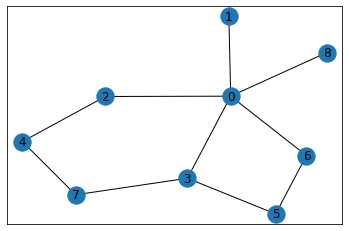

In [53]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

## Create the rewards graph 
* Create the matrix version of the list of points map.  
* Initialize the matrix to be the height and width of our points list (9 in this example)
* Initialize all values to -1
* Change the values to be 0 if it is a viable path and 100 if it is a goal path
* The y-axis is the state or where your bot is currently located, and the x-axis is your possible next actions. 
* Set gamma =0.8 as the discount factor
* The -1's in the table represent null values i.e. where there isn't a link between nodes.

In [54]:
SIZE_MATRIX = 9

In [55]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX, SIZE_MATRIX)))
R *= -1

In [56]:
for edge in edge_list:
    print(edge)
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    # reverse of point
    if edge[0] == goal:
         R[edge[::-1]] = 100
    else:
        R[edge[::-1]]= 0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [60]:
#stay in goal
R[goal, goal]= 100

In [61]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [62]:
gamma = 0.8

## Build Q learning matrix
* Build the matrix. The agent starts out knowing nothing, the matrix Q is initialized to zero.
* Define the following methods :
    * available_actions - returns all available actions in the state given as an argument
    * sample_next_action - chooses at random which action to be performed within the range of all the available actions.
    * update - updates the Q matrix according to the path selected and the Q learning algorithm
* The transition rule of Q learning is : Q(state, action) = R(state, action) + Gamma * Max[Q(next state, all actions)]
* According to this formula, a value assigned to a specific element of matrix Q, is equal to the sum of the corresponding value in matrix R and the learning parameter Gamma, multiplied by the maximum value of Q for all possible actions in the next state.
* Matrix Q, can be normalized (i.e.; converted to percentage) by dividing all non-zero entries by the highest number.

In [63]:
Q = np.matrix(np.zeros([SIZE_MATRIX, SIZE_MATRIX]))

In [64]:
Q

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [65]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
#state is our node
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row >= 0)[1]
    
    return available_actions

In [68]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    
    return next_action

np.where returns a tuple of ndarrays where the output array contains elements of x where condition is True. 
We pick the second element of the tuple which is a list of states where the reward is highest. 
If there are multiple states where the reward is highest, we pick one state at random.

In [69]:
def update(current_state, action, gamma):
    
    max_index = np.where(Q[action, ] == np.max(Q[action, ]))[1] 
    
    print('max_index', max_index.shape)

    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[action, max_index]

    Q[current_state, action] = R[current_state, action] + gamma * max_value
    
    print('max_value', R[current_state, action] + gamma * max_value)
  

## Start traversal
* Get available actions in the initial state and the sample next action to be performed
* Update the Q matrix


In [70]:
initial_state = 0

In [71]:
available_actions = get_available_actions(initial_state) 

In [72]:
print(available_actions)

[1 2 3 6 8]


In [73]:
action = sample_next_action(available_actions)

In [74]:
print(action)

1


In [75]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


## Training
* Train over 700 iterations.
* Select a random initial state.
* While the goal state hasn't been reached.
    * Select one among all possible actions for the current state.
    * Using this possible action, consider going to the next state.
    * Get maximum Q value for this next state based on all possible actions.
    * Set the next state as the current state.
* Normalize the trained Q matrix

In [76]:
scores = []

In [77]:
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0])) 
    
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)

    update(current_state, action, gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 51.2
max_index (1,)
max_value 80.0
max_index (1,)
max_value 51.2
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 64.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 40.96000000000001
max_index (1,)
max_value 180.0
max_index (1,)
max_value 51.2
max_i

In [78]:
print("Trained Q matrix:")
pd.DataFrame(Q)

Trained Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,254.761455,318.761455,398.451819,0.000000,0.000000,255.009164,0.000000,254.761455
1,318.761455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,318.761455,0.000000,0.000000,0.000000,399.009164,0.000000,0.000000,0.000000,0.000000
3,318.761455,0.000000,0.000000,0.000000,0.000000,318.761455,0.000000,498.761455,0.000000
4,0.000000,0.000000,319.207332,0.000000,0.000000,0.000000,0.000000,499.009164,0.000000
5,0.000000,0.000000,0.000000,398.451819,0.000000,0.000000,255.009164,0.000000,0.000000
6,318.451819,0.000000,0.000000,0.000000,0.000000,318.761455,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,398.451819,399.009164,0.000000,0.000000,498.761455,0.000000
8,318.761455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [79]:
print("Normalized Q matrix:")
pd.DataFrame(Q / np.max(Q) * 100)

Normalized Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,51.053462,63.878878,79.848598,0.000000,0.000000,51.103102,0.00000,51.053462
1,63.878878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
2,63.878878,0.000000,0.000000,0.000000,79.960288,0.000000,0.000000,0.00000,0.000000
3,63.878878,0.000000,0.000000,0.000000,0.000000,63.878878,0.000000,99.95036,0.000000
4,0.000000,0.000000,63.968230,0.000000,0.000000,0.000000,0.000000,100.00000,0.000000
5,0.000000,0.000000,0.000000,79.848598,0.000000,0.000000,51.103102,0.00000,0.000000
6,63.816828,0.000000,0.000000,0.000000,0.000000,63.878878,0.000000,0.00000,0.000000
7,0.000000,0.000000,0.000000,79.848598,79.960288,0.000000,0.000000,99.95036,0.000000
8,63.878878,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000


## Testing
* Start from point 0 and find the most efficient path to point 7
* In testing, the next action is chosen according to the highest Q value.

In [80]:
current_state = 0
steps = [current_state]

In [81]:
while current_state != 7:

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1]
    
#     print(np.where(Q[current_state,] == np.max(Q[current_state,])))
#     print(np.where(Q[current_state,] == np.max(Q[current_state,]))[1])
#     print(next_step_index.shape[0])
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [82]:
print("Most efficient path:")
print(steps)

Most efficient path:
[0, 3, 7]
